In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

In [3]:
import pandas as pd
df = pd.read_csv("Cricket_Players_Dataset.csv")
df.head(4)

,Unnamed: 0,100s,4 Wickets in Inn,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,...,Maidens,Matches,Name,Not_Outs,Opening_Batting,Overs,Runs,Runs_Conceded,Strike_Rate,Wickets
0,0,0,0.0,0,0,0,64.0,88.0,NaN,38.00,...,2.0,2(1977-1978),Aamer Hameed,0,NaN,11.0,0,38.0,NaN,1.0
1,1,0,0.0,6,0,0,47.0,130.0,128.0,30.50,...,NaN,5(1993-1995),Aamer Hanif,2,0.0,21.4,89,122.0,69.53,4.0
2,2,0,0.0,40,5,0,56.0,120.0,989.0,28.67,...,1.0,24(1988-1994),Aamer Malik,1,5.0,20.0,556,86.0,56.22,3.0
3,3,0,0.0,8,1,5,28.0,156.0,96.0,77.00,...,1.0,4(2015-),Aamer Yamin,2,NaN,26.0,95,154.0,98.96,2.0


In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df.isna().sum()

Unnamed: 0            0
100s                  0
4 Wickets in Inn    652
4s                    0
50s                   0
6s                    0
Age                   5
Balls               327
Balls_Faced           5
Balls_Average       928
Bat_Average         207
Bats(handed)         19
Bowl_Strike_rate    958
Bowling_Best        652
Bowls(handed)       417
DOB                   3
Ducks                 0
Economy_Rate        680
Highest_Score         5
Innings               4
Maidens             750
Matches               0
Name                  0
Not_Outs              0
Opening_Batting     231
Overs               328
Runs                  0
Runs_Conceded       675
Strike_Rate         155
Wickets             677
dtype: int64

In [6]:
#Unwanted Observations
df1 = df.drop(columns=['100s','4 Wickets in Inn','Bowling_Best','Ducks','Maidens','Opening_Batting','Runs_Conceded'])
df1.head(4)

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bats(handed),...,Economy_Rate,Highest_Score,Innings,Matches,Name,Not_Outs,Overs,Runs,Strike_Rate,Wickets
0,0,0,0,0,64.0,88.0,NaN,38.00,NaN,Right Handed,...,2.59,NaN,NaN,2(1977-1978),Aamer Hameed,0,11.0,0,NaN,1.0
1,1,6,0,0,47.0,130.0,128.0,30.50,44.50,Right Handed,...,5.63,36*,4.0,5(1993-1995),Aamer Hanif,2,21.4,89,69.53,4.0
2,2,40,5,0,56.0,120.0,989.0,28.67,25.27,Right Handed,...,4.30,90,23.0,24(1988-1994),Aamer Malik,1,20.0,556,56.22,3.0
3,3,8,1,5,28.0,156.0,96.0,77.00,95.00,Right Handed,...,5.92,62,3.0,4(2015-),Aamer Yamin,2,26.0,95,98.96,2.0


In [7]:
#About Dataset
features = df1.columns.tolist()
print("Columns = ",features)
print("")
print('length is ',len(features))
print("")
print("num of (rows,columns) = ",df1.shape)

Columns =  ['Unnamed: 0', '4s', '50s', '6s', 'Age', 'Balls', 'Balls_Faced', 'Balls_Average', 'Bat_Average', 'Bats(handed)', 'Bowl_Strike_rate', 'Bowls(handed)', 'DOB', 'Economy_Rate', 'Highest_Score', 'Innings', 'Matches', 'Name', 'Not_Outs', 'Overs', 'Runs', 'Strike_Rate', 'Wickets']

length is  23

num of (rows,columns) =  (2491, 23)


In [8]:
#Sampling the Dataset with Random sampling
sampler = np.random.permutation(2491)
df1.take(sampler)

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bats(handed),...,Economy_Rate,Highest_Score,Innings,Matches,Name,Not_Outs,Overs,Runs,Strike_Rate,Wickets
1716,1716,1,0,0,57.0,752.0,225.0,73.75,10.30,Right Handed,...,4.71,24,14.0,18(1990-1998),Mark W Priest,4,125.2,103,45.78,8.0
372,372,2,0,0,63.0,NaN,143.0,NaN,12.67,Right Handed,...,NaN,19,3.0,3(1979-1979),Christopher J D Chappell,0,NaN,38,26.57,NaN
163,163,68,4,10,42.0,183.0,1180.0,49.67,33.35,Left Handed,...,4.89,100,36.0,40(2000-2004),Hemang K Badani,10,30.3,867,73.47,3.0
63,63,0,0,0,53.0,338.0,28.0,23.18,NaN,Right Handed,...,4.53,6*,3.0,9(1996-1997),Rajab W Ali,3,56.2,7,25.00,11.0
74,74,130,13,9,68.0,2730.0,3334.0,42.85,30.54,Right Handed,...,4.33,102*,75.0,85(1975-1989),Mohinder Amarnath,12,450.2,1924,57.71,46.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1147,1147,6,0,1,37.0,642.0,381.0,38.92,17.91,Right Handed,...,4.36,37,14.0,15(2010-2011),Gregory A Lamb,3,107.0,197,51.71,12.0
509,509,0,0,0,63.0,194.0,18.0,NaN,9.00,Right Handed,...,5.23,7,2.0,4(1983-1985),Granville N De Silva,1,32.2,9,50.00,0.0
1030,1030,66,6,3,69.0,105.0,1331.0,21.33,34.42,Left Handed,...,3.66,78,28.0,31(1973-1981),Alvin I Kallicharran,4,17.3,826,62.06,3.0
109,109,0,0,0,25.0,423.0,45.0,37.70,3.33,Right Handed,...,5.35,4,7.0,9(2016-),M Amila Aponso,4,70.3,10,22.22,10.0


In [9]:
#After Sampling
df_new = df1.sample(n=750)
df_new.tail()

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bats(handed),...,Economy_Rate,Highest_Score,Innings,Matches,Name,Not_Outs,Overs,Runs,Strike_Rate,Wickets
1026,1026,0,0,0,44.0,371.0,25.0,25.25,10.0,Right Handed,...,4.90,5,5.0,10(1994-2000),Kabir Khan,4,61.5,10,40.00,12.0
1057,1057,0,0,0,20.0,24.0,33.0,NaN,9.0,Right Handed,...,7.75,9,1.0,1(2017-),Karim Janat,0,4.0,9,27.27,0.0
243,243,15,0,1,33.0,2022.0,248.0,43.89,10.0,Left Handed,...,4.95,22*,25.0,42(2011-),Devendra Bishoo,10,337.0,150,60.48,38.0
79,79,1,0,0,40.0,426.0,9.0,40.33,NaN,Right Handed,...,5.11,5*,4.0,8(2007-2008),Merenna K D I Amerasinghe,4,71.0,6,66.67,9.0
1922,1922,0,0,1,44.0,498.0,11.0,39.90,4.0,NaN,...,4.81,8,2.0,10(1998-1998),Rahul L Sanghvi,0,83.0,8,72.73,10.0


In [10]:
#Before Imputing
df_new.isna().sum()

Unnamed: 0            0
4s                    0
50s                   0
6s                    0
Age                   2
Balls                98
Balls_Faced           0
Balls_Average       260
Bat_Average          65
Bats(handed)          4
Bowl_Strike_rate    271
Bowls(handed)       113
DOB                   1
Economy_Rate        198
Highest_Score         2
Innings               1
Matches               0
Name                  0
Not_Outs              0
Overs                98
Runs                  0
Strike_Rate          44
Wickets             197
dtype: int64

In [11]:
#Handling not available values with Imputing 

df_new['Bat_Average'] = df_new['Bat_Average'].fillna(0)
df_new['Balls'] = df_new['Balls'].fillna(0)
df_new['Balls_Average'] = df_new['Balls_Average'].fillna(0)
df_new['Bowl_Strike_rate'] = df_new['Bowl_Strike_rate'].fillna(0)
df_new['Overs'] = df_new['Overs'].fillna(0)
df_new['Wickets'] = df_new['Wickets'].fillna(0)
df_new['Bowl_Strike_rate'] = df_new['Bowl_Strike_rate'].fillna(df_new.mean())
df_new['Economy_Rate'] = df_new['Economy_Rate'].fillna(df_new.mean())
df_new['Innings'] = df_new['Innings'].fillna(df_new.mean())
df_new = df_new.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [12]:
#After Imputing
df_new.isna().sum()

Unnamed: 0          0
4s                  0
50s                 0
6s                  0
Age                 0
Balls               0
Balls_Faced         0
Balls_Average       0
Bat_Average         0
Bats(handed)        0
Bowl_Strike_rate    0
Bowls(handed)       0
DOB                 0
Economy_Rate        0
Highest_Score       0
Innings             0
Matches             0
Name                0
Not_Outs            0
Overs               0
Runs                0
Strike_Rate         0
Wickets             0
dtype: int64

In [13]:
df_new.tail(3)

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bats(handed),...,Economy_Rate,Highest_Score,Innings,Matches,Name,Not_Outs,Overs,Runs,Strike_Rate,Wickets
243,243,15,0,1,33.0,2022.0,248.0,43.89,10.0,Left Handed,...,4.95,22*,25.0,42(2011-),Devendra Bishoo,10,337.0,150,60.48,38.0
79,79,1,0,0,40.0,426.0,9.0,40.33,0.0,Right Handed,...,5.11,5*,4.0,8(2007-2008),Merenna K D I Amerasinghe,4,71.0,6,66.67,9.0
1922,1922,0,0,1,44.0,498.0,11.0,39.90,4.0,Right Handed,...,4.81,8,2.0,10(1998-1998),Rahul L Sanghvi,0,83.0,8,72.73,10.0


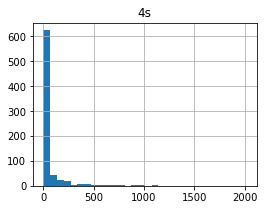

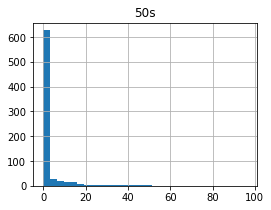

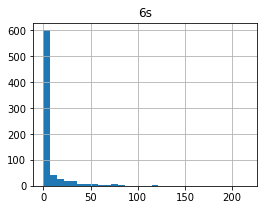

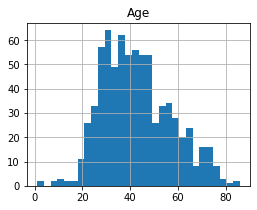

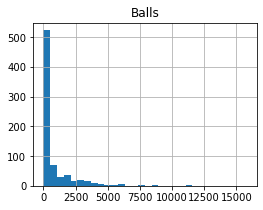

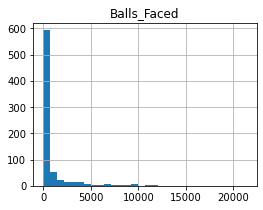

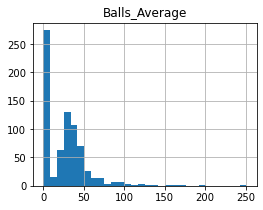

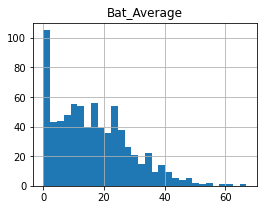

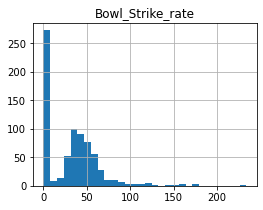

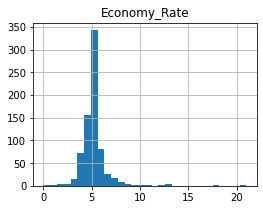

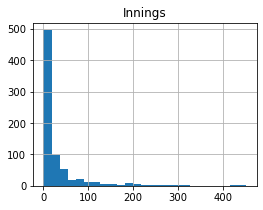

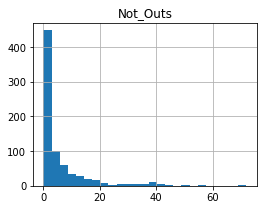

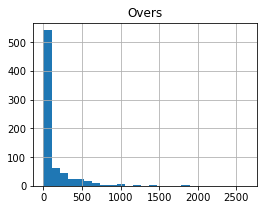

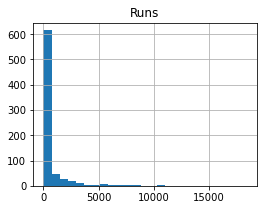

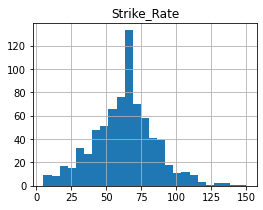

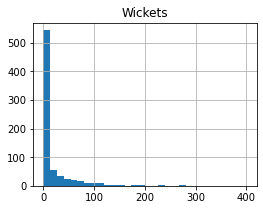

In [14]:
hist = df_new.hist(bins = 30,column = '4s',figsize = (4,3))
hist = df_new.hist(bins = 30,column = '50s',figsize = (4,3))
hist = df_new.hist(bins = 30,column = '6s',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Age',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Balls',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Balls_Faced',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Balls_Average',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Bat_Average',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Bowl_Strike_rate',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Economy_Rate',figsize = (4,3))
hist = df_new.hist(bins = 25,column = 'Innings',figsize = (4,3))
hist = df_new.hist(bins = 25,column = 'Not_Outs',figsize = (4,3))
hist = df_new.hist(bins = 25,column = 'Overs',figsize = (4,3))
hist = df_new.hist(bins = 25,column = 'Runs',figsize = (4,3))
hist = df_new.hist(bins = 25,column = 'Strike_Rate',figsize = (4,3))
hist = df_new.hist(bins = 30,column = 'Wickets',figsize = (4,3))

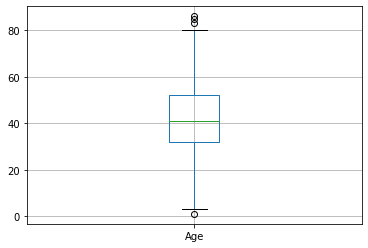

In [15]:
df_new.boxplot('Age')

In [16]:
q1=df_new['Age'].quantile(0.25)
q3=df_new['Age'].quantile(0.75)
iqr=q3-q1
filter = (df_new['Age'] >=q1-1.5*iqr) & (df_new['Age'] <=q3+1.5*iqr)


In [17]:
df_new=df_new.loc[filter]

42.5402144772118

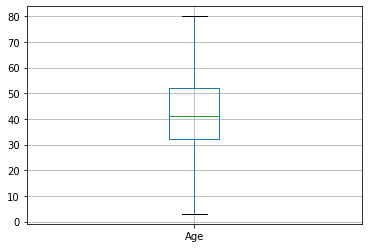

In [18]:
df_new.boxplot('Age')
df_new['Age'].mean()

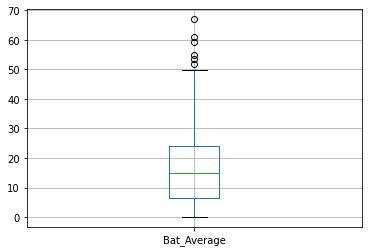

In [19]:
df_new.boxplot('Bat_Average')

In [20]:
q1=df_new['Bat_Average'].quantile(0.25)
q3=df_new['Bat_Average'].quantile(0.75)
iqr=q3-q1
filter = (df_new['Bat_Average'] >=q1-1.5*iqr) & (df_new['Bat_Average'] <=q3+1.5*iqr)


In [21]:
df_new=df_new.loc[filter]

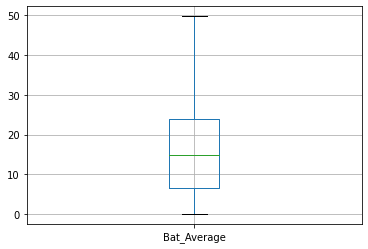

In [22]:
df_new.boxplot('Bat_Average')

In [23]:
df_new

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bats(handed),...,Economy_Rate,Highest_Score,Innings,Matches,Name,Not_Outs,Overs,Runs,Strike_Rate,Wickets
2097,2097,2,0,0,36.0,2476.0,121.0,33.44,4.00,Right Handed,...,6.08,10*,21.0,53(2005-2011),Shanthakumaran Sreesanth,10,412.4,44,36.36,75.0
92,92,86,4,55,28.0,1485.0,1020.0,25.03,27.73,Left Handed,...,6.07,131*,44.0,49(2013-),Corey J Anderson,4,247.3,1109,108.73,60.0
670,670,0,0,0,38.0,0.0,71.0,0.00,13.67,Right Handed,...,5.00,13,6.0,11(2001-2002),James S Foster,3,0.0,41,57.75,0.0
2170,2170,2,0,0,35.0,465.0,73.0,32.62,26.00,Right Handed,...,5.47,11*,8.0,10(2002-2004),Tareq Aziz,7,77.3,26,35.62,13.0
970,970,449,50,44,61.0,436.0,11014.0,42.43,41.70,Right Handed,...,4.09,119*,218.0,233(1975-1996),Javed Miandad,41,64.0,7381,67.01,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1026,0,0,0,44.0,371.0,25.0,25.25,10.00,Right Handed,...,4.90,5,5.0,10(1994-2000),Kabir Khan,4,61.5,10,40.00,12.0
1057,1057,0,0,0,20.0,24.0,33.0,0.00,9.00,Right Handed,...,7.75,9,1.0,1(2017-),Karim Janat,0,4.0,9,27.27,0.0
243,243,15,0,1,33.0,2022.0,248.0,43.89,10.00,Left Handed,...,4.95,22*,25.0,42(2011-),Devendra Bishoo,10,337.0,150,60.48,38.0
79,79,1,0,0,40.0,426.0,9.0,40.33,0.00,Right Handed,...,5.11,5*,4.0,8(2007-2008),Merenna K D I Amerasinghe,4,71.0,6,66.67,9.0


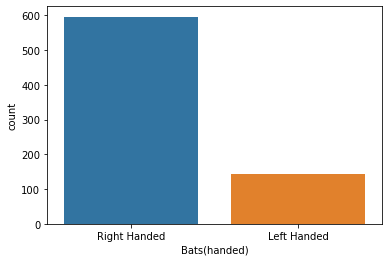

In [24]:
sns.countplot(x='Bats(handed)',data=df_new)

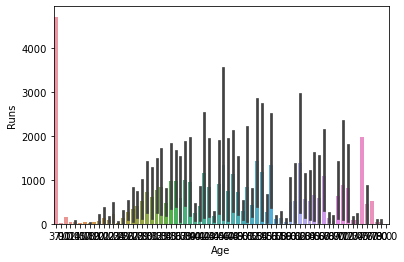

In [25]:
sns.barplot(x='Age',y='Runs',data=df_new)

In [26]:
df_new.mean()

Unnamed: 0          1264.702703
4s                    56.798649
50s                    3.362162
6s                     7.904054
Age                   42.614865
Balls                860.793243
Balls_Faced          880.098649
Balls_Average         26.549878
Bat_Average           16.002338
Bowl_Strike_rate      31.910054
Economy_Rate           5.151446
Innings               28.700000
Not_Outs               5.318919
Overs                144.217297
Runs                 652.948649
Strike_Rate           62.872054
Wickets               20.851351
dtype: float64

In [27]:
df_new.var()

Unnamed: 0          5.282421e+05
4s                  2.380336e+04
50s                 9.659938e+01
6s                  4.317134e+02
Age                 2.014144e+02
Balls               3.217423e+06
Balls_Faced         4.452196e+06
Balls_Average       8.131999e+02
Bat_Average         1.385873e+02
Bowl_Strike_rate    1.012855e+03
Economy_Rate        2.025493e+00
Innings             2.640830e+03
Not_Outs            8.170600e+01
Overs               8.909260e+04
Runs                2.709240e+06
Strike_Rate         4.936303e+02
Wickets             2.113299e+03
dtype: float64

In [28]:
df_new.describe()

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Not_Outs,Overs,Runs,Strike_Rate,Wickets
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,1264.702703,56.798649,3.362162,7.904054,42.614865,860.793243,880.098649,26.549878,16.002338,31.910054,5.151446,28.700000,5.318919,144.217297,652.948649,62.872054,20.851351
std,726.802626,154.283375,9.828498,20.777714,14.192054,1793.717683,2110.022800,28.516660,11.772312,31.825379,1.423198,51.389007,9.039137,298.483832,1645.976937,22.217792,45.970627
min,4.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,648.750000,1.000000,0.000000,0.000000,32.000000,2.750000,38.000000,0.000000,6.500000,0.000000,4.630000,3.000000,0.000000,3.000000,19.000000,49.865000,0.000000
50%,1276.500000,7.000000,0.000000,1.000000,41.000000,158.000000,158.000000,27.000000,14.855000,33.940000,5.000000,9.000000,2.000000,28.700000,94.500000,64.850000,3.000000
75%,1888.750000,31.250000,1.000000,5.000000,52.000000,770.500000,562.750000,39.135000,24.000000,49.417500,5.332500,27.000000,6.000000,128.275000,397.750000,75.292500,17.000000
max,2489.000000,2016.000000,96.000000,215.000000,80.000000,15775.000000,21367.000000,251.000000,49.750000,234.000000,21.000000,452.000000,72.000000,2629.100000,18426.000000,150.000000,400.000000


In [29]:
q_1=df_new['Strike_Rate'].quantile(0.25)
q_3=df_new['Strike_Rate'].quantile(0.75)
iqr_=q_3-q_1
filter = (df_new['Strike_Rate'] >=q_1-1.5*iqr_) & (df_new['Strike_Rate'] <=q_3+1.5*iqr_)

In [30]:
df_new=df_new.loc[filter]


In [31]:
list_cont=['4s','50s','6s','Age','Balls','Balls_Faced','Balls_Average','Bat_Average','Bowl_Strike_rate','Economy_Rate','Innings','Not_Outs','Overs','Runs','Strike_Rate','Wickets']

In [32]:
df_norm1 = df_new.copy()   
for cols in list_cont:
    df_norm1[cols] = (df_norm1[cols] - df_norm1[cols].min())/(df_norm1[cols].max() - df_norm1[cols].min())
    
df_norm1.describe()

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Not_Outs,Overs,Runs,Strike_Rate,Wickets
count,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000,717.000000
mean,1253.951185,0.028872,0.036059,0.037294,0.517071,0.055991,0.042347,0.104579,0.326264,0.135742,0.244374,0.065033,0.075740,0.056288,0.036365,0.497529,0.053490
std,723.219346,0.077591,0.103832,0.097825,0.185480,0.115222,0.100087,0.110896,0.236574,0.134780,0.068113,0.115044,0.127018,0.115039,0.090554,0.197062,0.116484
min,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,644.000000,0.000496,0.000000,0.000000,0.376623,0.000127,0.001919,0.000000,0.135276,0.000000,0.220476,0.006637,0.000000,0.001141,0.001194,0.372245,0.000000
50%,1247.000000,0.003472,0.000000,0.004651,0.493506,0.010269,0.007722,0.107570,0.301508,0.145299,0.238095,0.022124,0.027778,0.011030,0.005319,0.519555,0.007500
75%,1878.000000,0.016369,0.010417,0.023256,0.636364,0.052108,0.027519,0.155657,0.486432,0.211068,0.252381,0.061947,0.083333,0.051843,0.022088,0.618523,0.045000
max,2489.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df_standard1 = df_new.copy()
    
for cols1 in list_cont:
    df_standard1[cols1] = (df_standard1[cols1] - df_standard1[cols1].mean())/(df_standard1[cols1].std())
    
df_standard1.describe()

,Unnamed: 0,4s,50s,6s,Age,Balls,Balls_Faced,Balls_Average,Bat_Average,Bowl_Strike_rate,Economy_Rate,Innings,Not_Outs,Overs,Runs,Strike_Rate,Wickets
count,717.000000,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02,7.170000e+02
mean,1253.951185,-5.582084e-17,9.491865e-17,1.200032e-17,-6.973734e-17,-4.393665e-17,-1.703271e-17,1.680045e-17,-5.487630e-16,-3.098405e-16,1.076158e-15,-2.895561e-17,7.540845e-17,-1.122223e-16,3.933008e-17,2.373895e-15,-5.489178e-17
std,723.219346,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,4.000000,-3.720988e-01,-3.472815e-01,-3.812290e-01,-2.787742e+00,-4.859388e-01,-4.231022e-01,-9.430396e-01,-1.379123e+00,-1.007134e+00,-3.587783e+00,-5.652860e-01,-5.962932e-01,-4.892927e-01,-4.015848e-01,-2.524732e+00,-4.592062e-01
25%,644.000000,-3.657059e-01,-3.472815e-01,-3.812290e-01,-7.572126e-01,-4.848385e-01,-4.039304e-01,-9.430396e-01,-8.073078e-01,-1.007134e+00,-3.508568e-01,-5.075934e-01,-5.962932e-01,-4.793736e-01,-3.883996e-01,-6.357561e-01,-4.592062e-01
50%,1247.000000,-3.273485e-01,-3.472815e-01,-3.336831e-01,-1.270484e-01,-3.968113e-01,-3.459473e-01,2.696460e-02,-1.046468e-01,7.091143e-02,-9.218244e-02,-3.729772e-01,-3.776015e-01,-3.934087e-01,-3.428508e-01,1.117747e-01,-3.948198e-01
75%,1878.000000,-1.611332e-01,-2.469588e-01,-1.434997e-01,6.431522e-01,-3.369925e-02,-1.481501e-01,4.605924e-01,6.770316e-01,5.588857e-01,1.175536e-01,-2.682131e-02,5.978182e-02,-3.863810e-02,-1.576588e-01,6.139904e-01,-7.288750e-02
max,2489.000000,1.251599e+01,9.283693e+00,9.841132e+00,2.603663e+00,8.192990e+00,9.568228e+00,8.074407e+00,2.847889e+00,6.412358e+00,1.109374e+01,8.127073e+00,7.276607e+00,8.203414e+00,1.064161e+01,2.549813e+00,8.125654e+00


<Figure size 432x288 with 0 Axes>

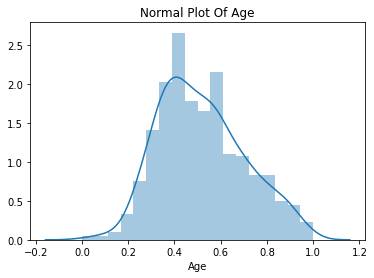

<Figure size 432x288 with 0 Axes>

In [34]:
sns.distplot(df_norm1['Age'],kde=True)
plt.title("Normal Plot Of Age")
plt.figure()

<Figure size 432x288 with 0 Axes>

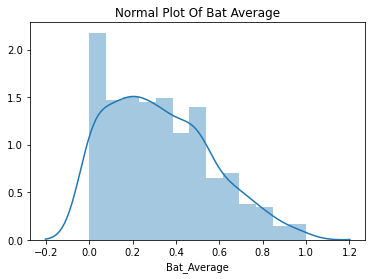

<Figure size 432x288 with 0 Axes>

In [35]:
sns.distplot(df_norm1['Bat_Average'],kde=True)
plt.title("Normal Plot Of Bat Average")
plt.figure()


<Figure size 432x288 with 0 Axes>

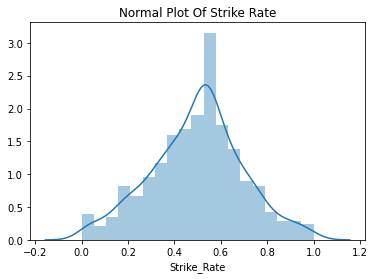

<Figure size 432x288 with 0 Axes>

In [36]:
sns.distplot(df_norm1['Strike_Rate'],kde=True)
plt.title("Normal Plot Of Strike Rate")
plt.figure()

<Figure size 432x288 with 0 Axes>

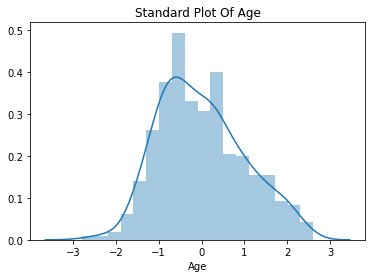

<Figure size 432x288 with 0 Axes>

In [37]:
sns.distplot(df_standard1['Age'],kde=True)
plt.title("Standard Plot Of Age")
plt.figure()

<Figure size 432x288 with 0 Axes>

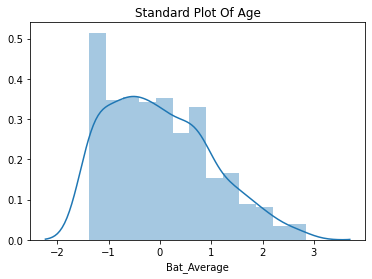

<Figure size 432x288 with 0 Axes>

In [38]:
sns.distplot(df_standard1['Bat_Average'],kde=True)
plt.title("Standard Plot Of Age")
plt.figure()

<Figure size 432x288 with 0 Axes>

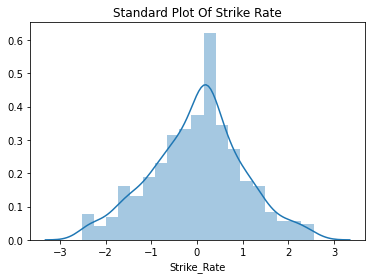

<Figure size 432x288 with 0 Axes>

In [39]:
sns.distplot(df_standard1['Strike_Rate'],kde=True)
plt.title("Standard Plot Of Strike Rate")
plt.figure()

In [40]:
#Hypothesis Testing For 'Age' Column
H0="The mean age is 43.1 years" #Null hypothesis
H1="The mean age is not 43.1 years"#Alternate hypothesis
mean_pop=43.1 #population mean from hypothesis

#Alpha values for corresponding tailed tests
test="two_tailed_test" #lets take two tailed test
if(test=="one_tailed_test"):
    no_tails=1
    alpha=0.05
elif(test=="two_tailed_test"):
    no_tails=2
    alpha=0.025


In [41]:
sample_mean=df_new['Age'].mean()
sample_sd=df_new['Age'].std()
no_values=len(df_new)

sample_mean

42.81450488145049

In [42]:
z_score=(sample_mean-mean_pop)/(sample_sd/np.sqrt(no_values))
p=scipy.stats.norm.sf(z_score)

if p>alpha:
    print('Null hypothesis is accepted')
    print('Accepted hypothesis is :',H0)
else:
    print('Alternate hypothesis is accepted')
    print('Accepted hypothesis is :',H1)


Null hypothesis is accepted
Accepted hypothesis is : The mean age is 43.1 years
